# Pima Indians Diabetes Database


In [114]:
#Importing libraries:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

In [9]:
#downloading 
df = pd.read_csv("diabetes.csv")
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [25]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [27]:
df.shape

(768, 9)

#### Data Cleaning and Preprocessing

In [71]:
int(df[df.duplicated()].sum().sum())
#We do not have any dublicates

0

In [21]:
#dublicates
print(f"There are {len(df[df.duplicated()])} duplicates and {df.isnull().sum().sum()} missing values")


There are 0 duplicates and 0 missing values


In [141]:
#outliers
z_scores = stats.zscore(df[['Insulin']])
abs_z_scores = np.abs(z_scores)
filtered_entries = (abs_z_scores < 3).all(axis=1)
# df_no_outliers = df[filtered_entries]
outliers = (abs_z_scores >= 3).any(axis=1)
df[outliers]

#based on scatterplots i decided to impute only extreme outlier for Skin Thickness
# df.loc[df['SkinThickness'] > 80, 'SkinThickness'] = df["SkinThickness"].median()
# df[df['SkinThickness'] > 80]
#we imputed it with median 

#Insulin
df.loc[df['Insulin'] >= 400, 'Insulin'] = df["Insulin"].median()
df[df['Insulin'] >= 400]

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome


#### Exploratory Data Analysis

In [28]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


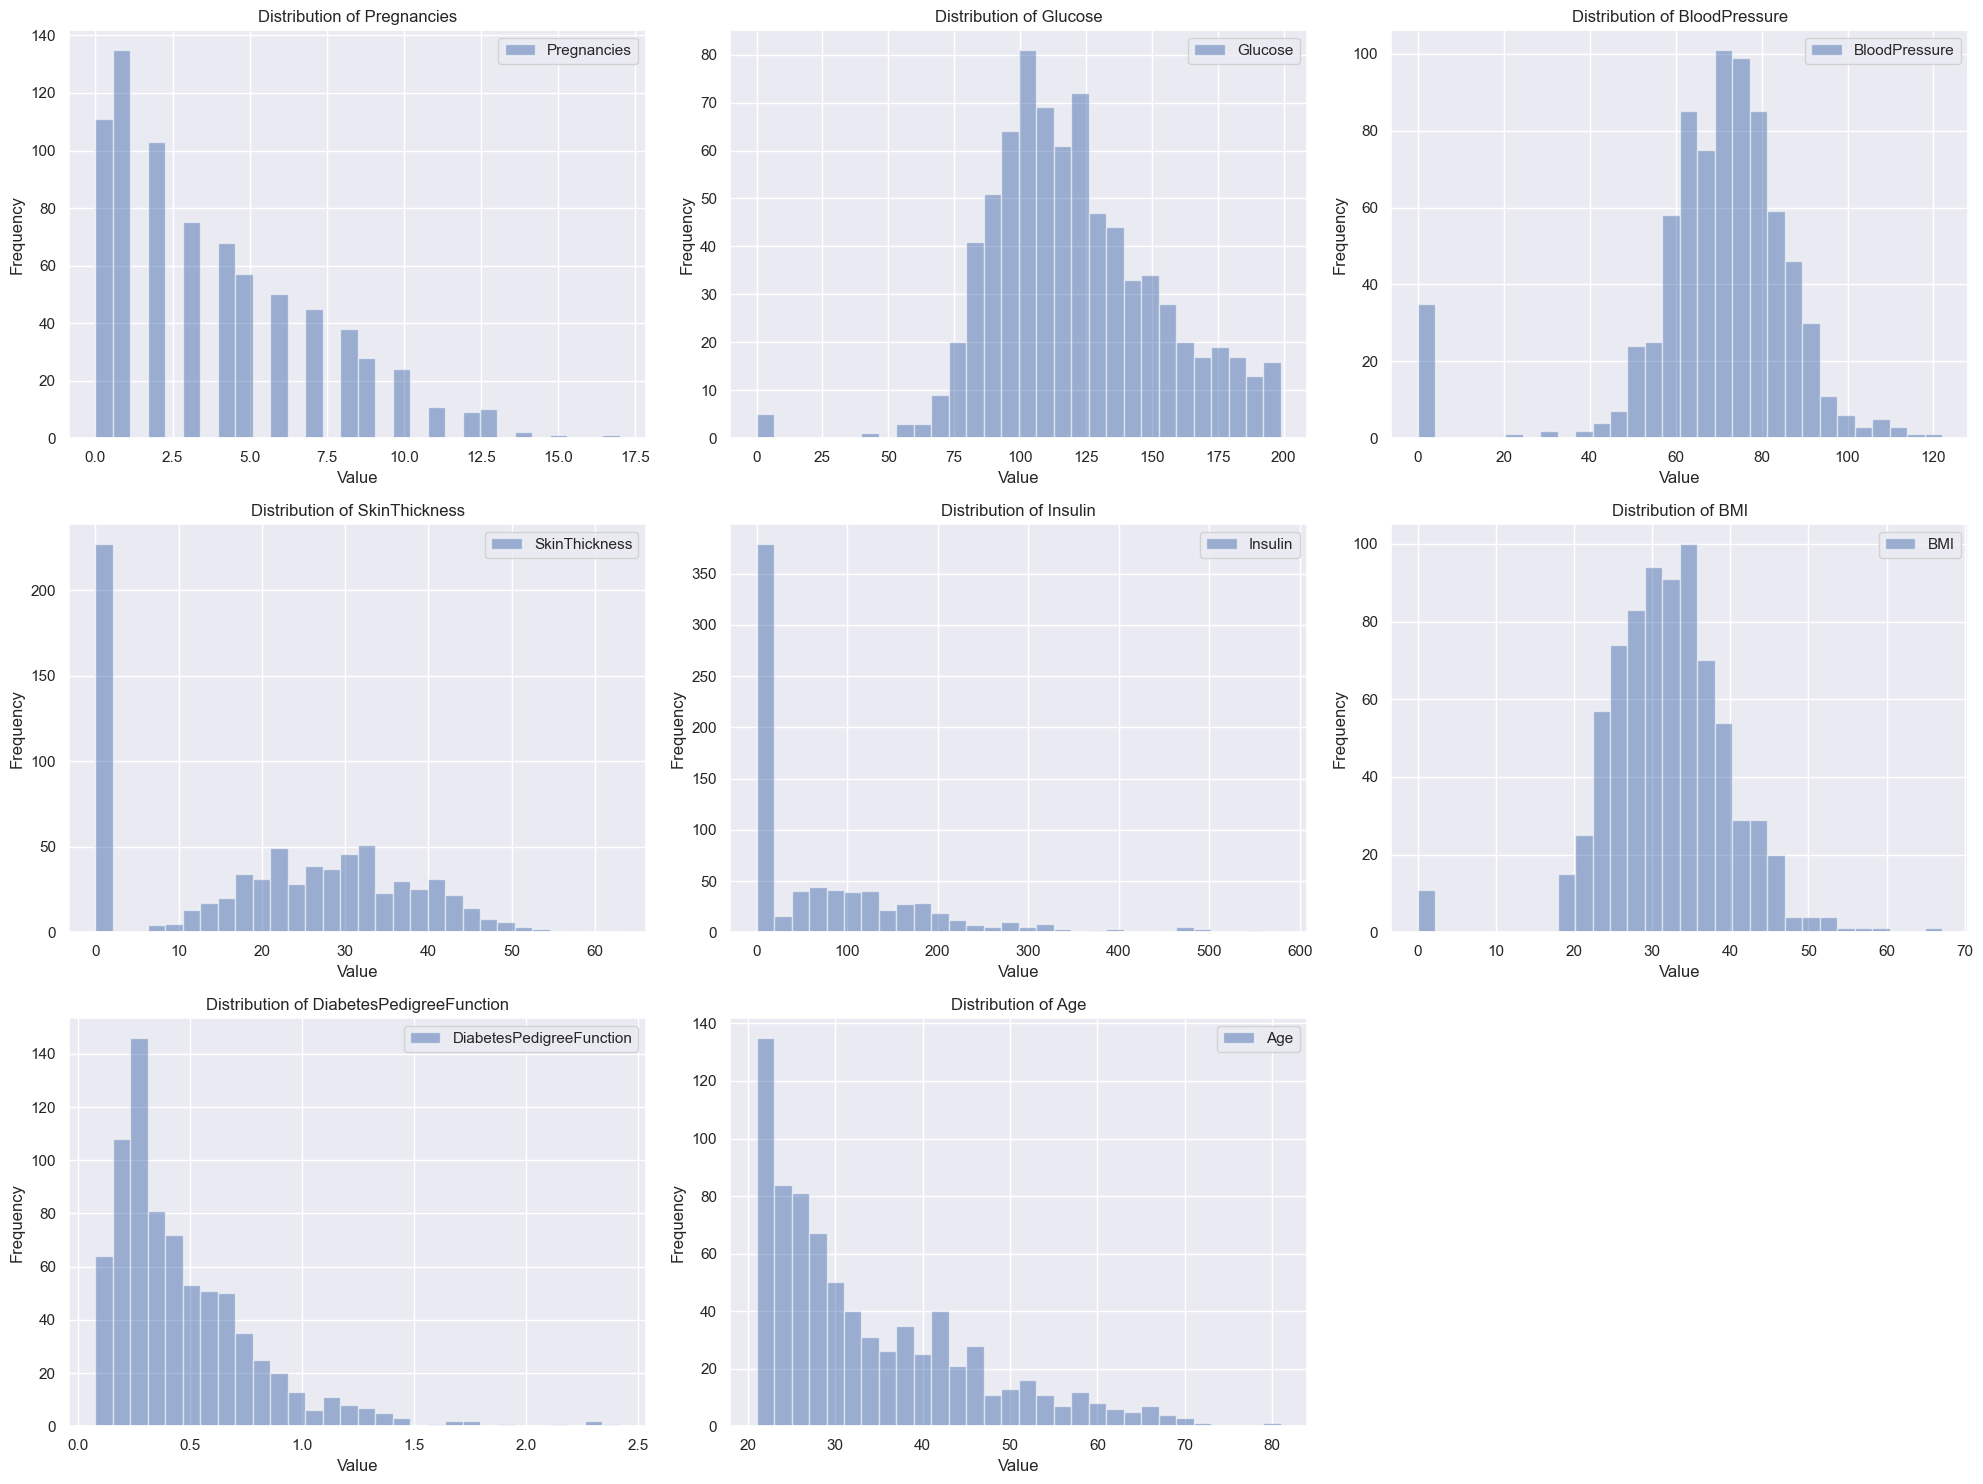

In [140]:
plt.figure(figsize = (20,15))
for i, column in enumerate(df.columns[:-1], 1):
    plt.subplot(3, 3, i)  # Create subplots in a 2x2 grid
    plt.hist(df[column], bins=30, alpha=0.5, label=column)  # Plot histogram for each column
    plt.xlabel('Value')
    plt.ylabel('Frequency')
    plt.title(f'Distribution of {column}')
    plt.legend()

# Adjust layout
plt.tight_layout()

# Show plot
plt.show()

#### From distribution plots we can see that the outliers in different columns and it is interesting if there is correlation between for example 0 skin thickness and having a diabetes, also why do we have BMI of 0 in the distributions, we gotta check all that things

In [56]:
#Pregnancies 
df.loc[df['Pregnancies'] > 15]
#Can you imagine that this woman was pregnant 17 times, we got to check correlation between number of pregnancies and risk of having a diabetes


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
159,17,163,72,41,114,40.9,0.817,47,1


In [ ]:
#Glucose
#Distribution of glucose looks normal and indeed normal amount of glucose for people is between 75 and 100 mg/dl

In [66]:
#Blood pressure 
df.iloc[(df.iloc[:, 2] == 0).values].head(3)
#Same thing as with BMI, looks like 0 was imputed on missing values place and the same implies for insulin, skin thickness 

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
7,10,115,0,0,0,35.3,0.134,29,0
15,7,100,0,0,0,30.0,0.484,32,1
49,7,105,0,0,0,0.0,0.305,24,0


In [ ]:
#BMI
df[df["BMI"]==0]
# I think that 0 BMI means that it was a missing value and 0 was imputed because obese people have much higher risk having type 2 diabetes, so 0 does not impact cases when the data was not presented

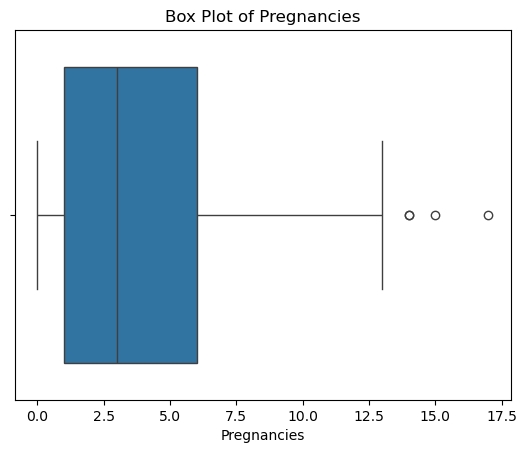

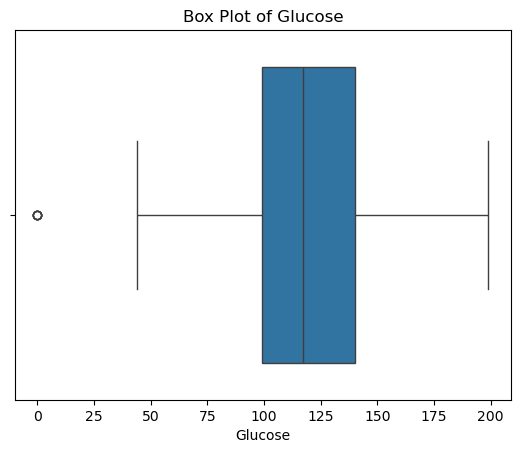

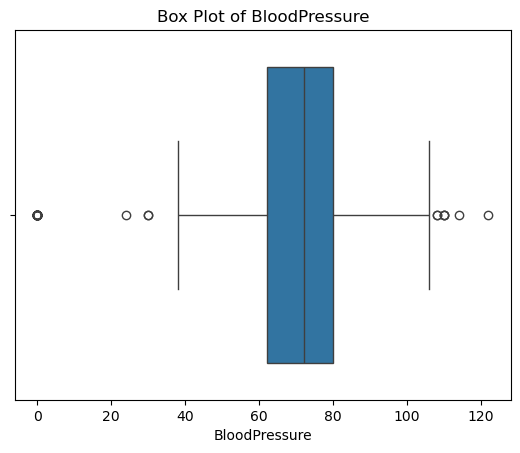

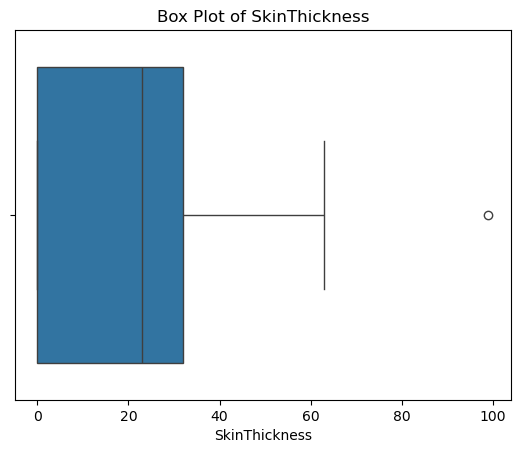

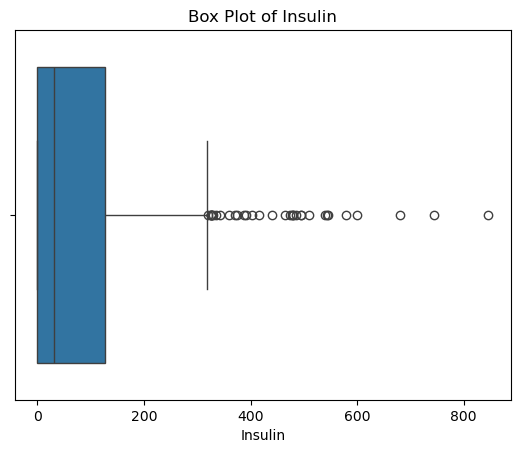

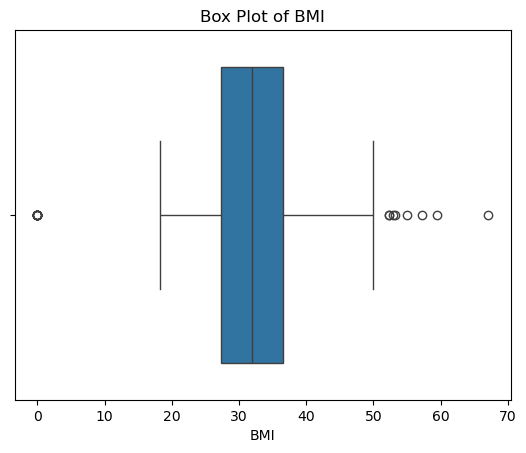

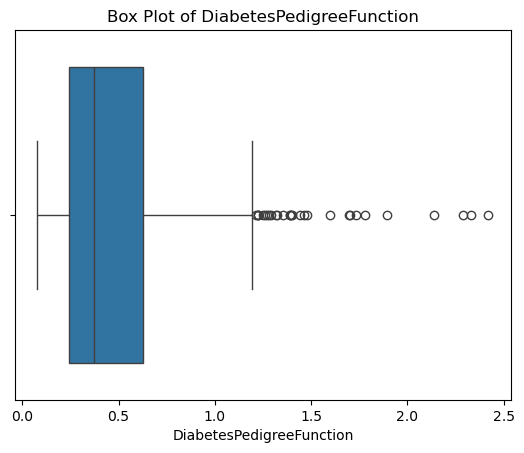

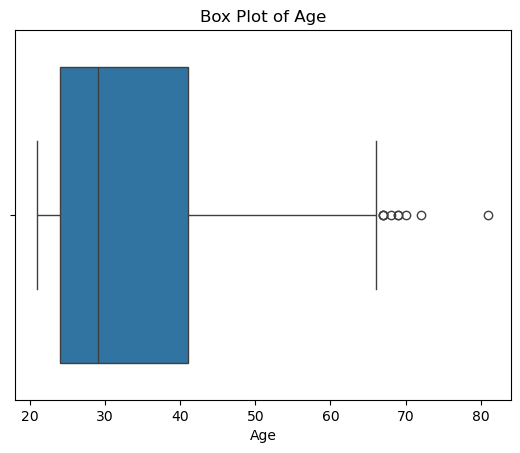

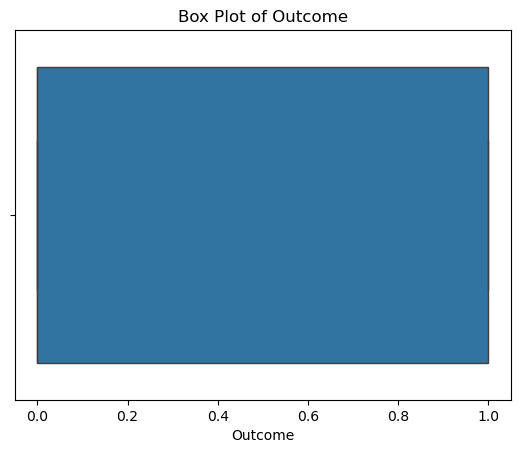

In [76]:
for i, column in enumerate(df.columns):
    plt.figure(i)  # Create a new figure for each column
    sns.boxplot(x=df[column])  # Create a box plot for the current column
    plt.title(f'Box Plot of {column}')  # Add a title to each plot
    plt.show()  # Display the plot

Look at the insulin and skin thickness there are outliers that we should take care of

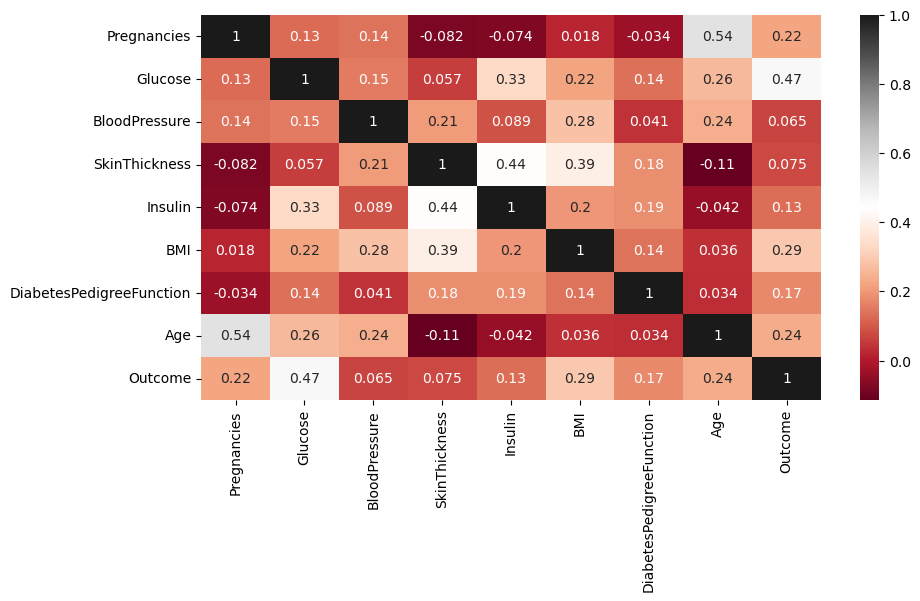

In [95]:
#Let's build a heatmap to check correlation:
plt.figure(figsize=(10,5))
heatmap= df.corr()
sns.heatmap(heatmap,cmap="RdGy",annot=True)
plt.show()

In [ ]:
#We can see the moderate correlation between Glucose and outcome, also I noticed the correlation between age and number of pregnancies which is expected, overall there are surprising correlations.

/opt/anaconda3/envs/deabetes_pred/lib/python3.11/site-packages/seaborn/axisgrid.py:2100: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


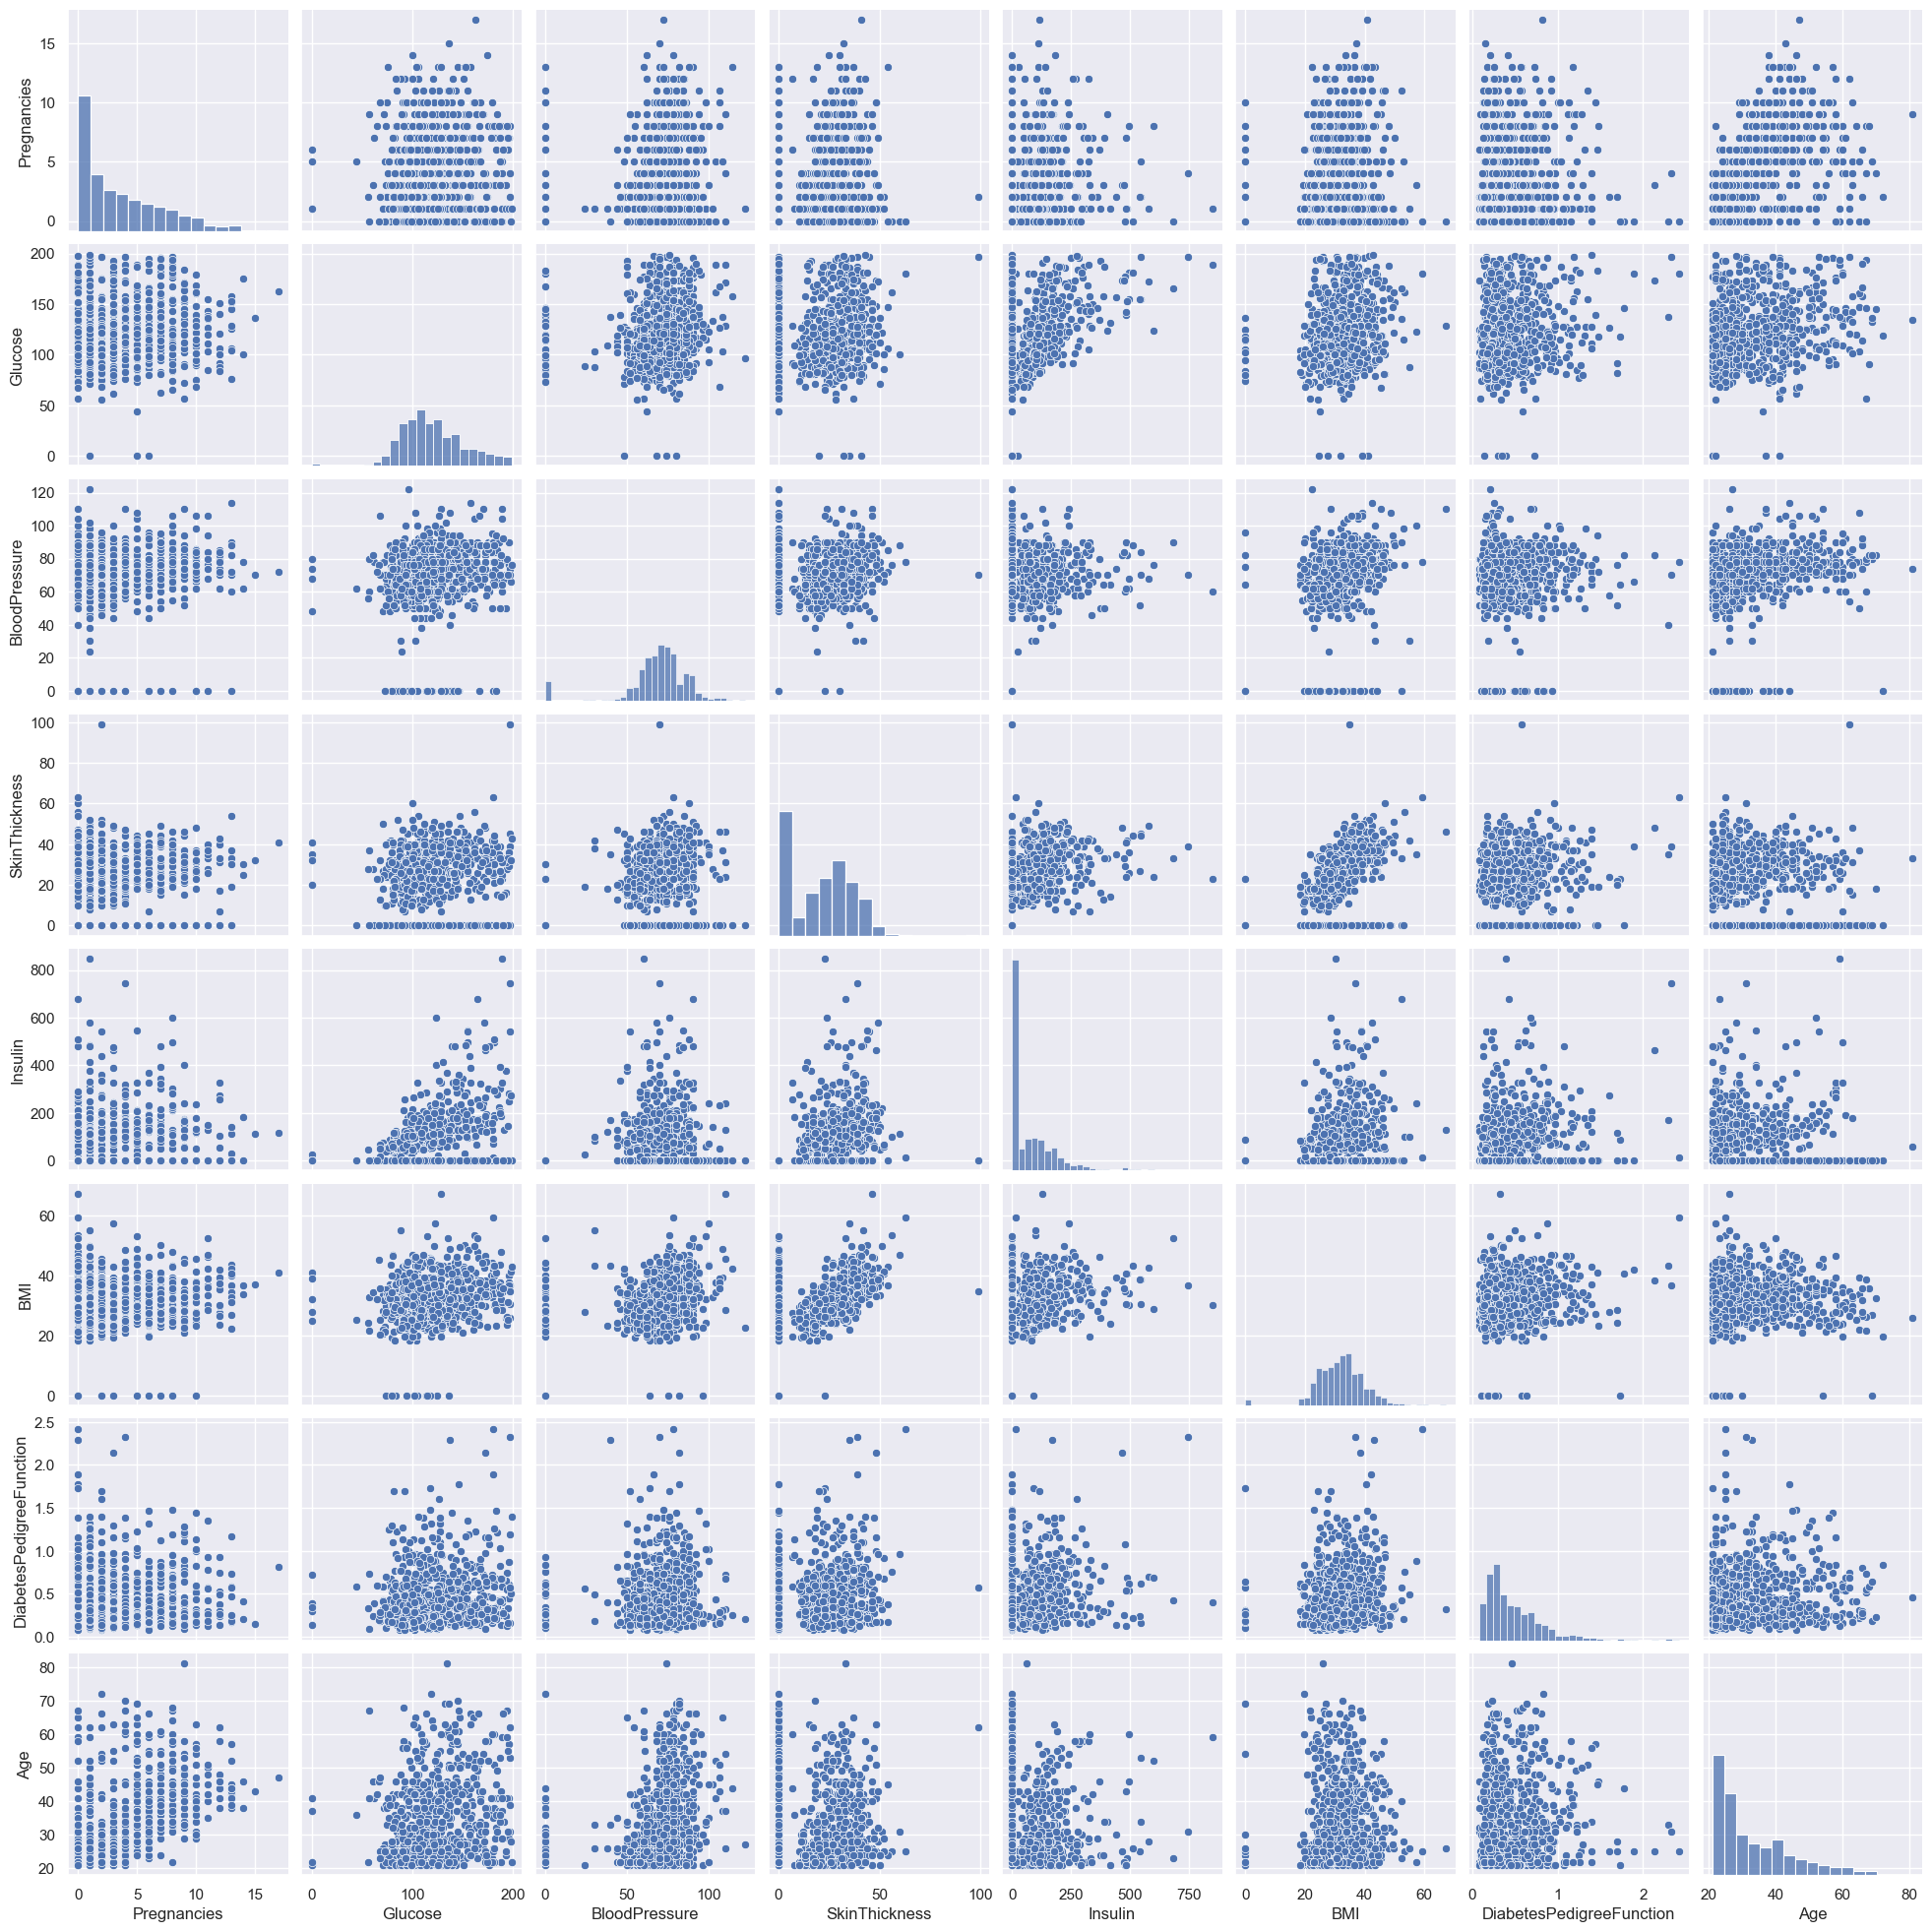

In [110]:
#scatterplot
sns.set_theme()
cols = [column for column in df.columns[:-1]]
sns.pairplot(df[cols], size = 2.5)
plt.show()

In [106]:
#There is a noticeable positive correlation between BMI and Age, BMI and Insulin, and Glucose and Insulin.
#

['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome']
